<span style="color:#e5065c; font-size:28px; font-weight:700">Linear Discriminant Analysis</span>

In this practice, we will create some toy data sets to demonstrate the idea of linear separability 
and apply LDA to them to see how it performs on data sets with different characteristics.

Let's create a data set with linearly separable classes. 
We'll have only two dimensions to make it easier to plot.

In [2]:
# Remember, a different data set will be created randomly every time you run this code.
# A data set with 150 samples where class means are 3,3 and 8,8 with a sigma of 1. 

# 75 (x,y) pairs with (3,3) mean
points_one <- cbind(rnorm(n = 75, mean = 3, sd = 1), rnorm(n = 75, mean = 3, sd = 1))
# rnorm() generates random numbers from a normal distribution
 
# 75 (x,y) pairs with (8,8) mean
points_two <- cbind(rnorm(n = 75, mean = 8, sd = 1), rnorm(n = 75, mean = 8, sd = 1))

# first 75 will be class 1, last 75 will be class -1
total_points <- c(rep(1, times = 75),rep(-1, times = 75)) 
total_points
# rep() replicates the values in x (i.e., the first argument).  The second argument specifies
# the number of times the values in x should be replicated.

# Now create the data frame
points_data <- as.data.frame(cbind(rbind(points_one, points_two), total_points))
names(points_data) <- c("X", "Y", "class")
head(points_data)

# you can also read from the file instead. 
# data1 <- read.csv("/dsa/data/all_datasets/toydata/data1.csv", header=TRUE)

str(points_data)

[1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [51]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [76] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
[101] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
[126] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

X,Y,class
2.5401884,3.850737,1
2.3109640,3.846107,1
2.0748894,2.695685,1
3.8898986,1.569046,1
0.7285330,3.342066,1
0.8348501,3.199057,1


'data.frame':	150 obs. of  3 variables:
 $ X    : num  2.54 2.311 2.075 3.89 0.729 ...
 $ Y    : num  3.85 3.85 2.7 1.57 3.34 ...
 $ class: num  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
head(points_data,80)

X,Y,class
2.5401884,3.850737,1
2.3109640,3.846107,1
2.0748894,2.695685,1
3.8898986,1.569046,1
0.7285330,3.342066,1
0.8348501,3.199057,1
4.4282865,3.218058,1
2.4321457,3.989699,1
1.7752927,2.207826,1
3.1710490,3.022931,1


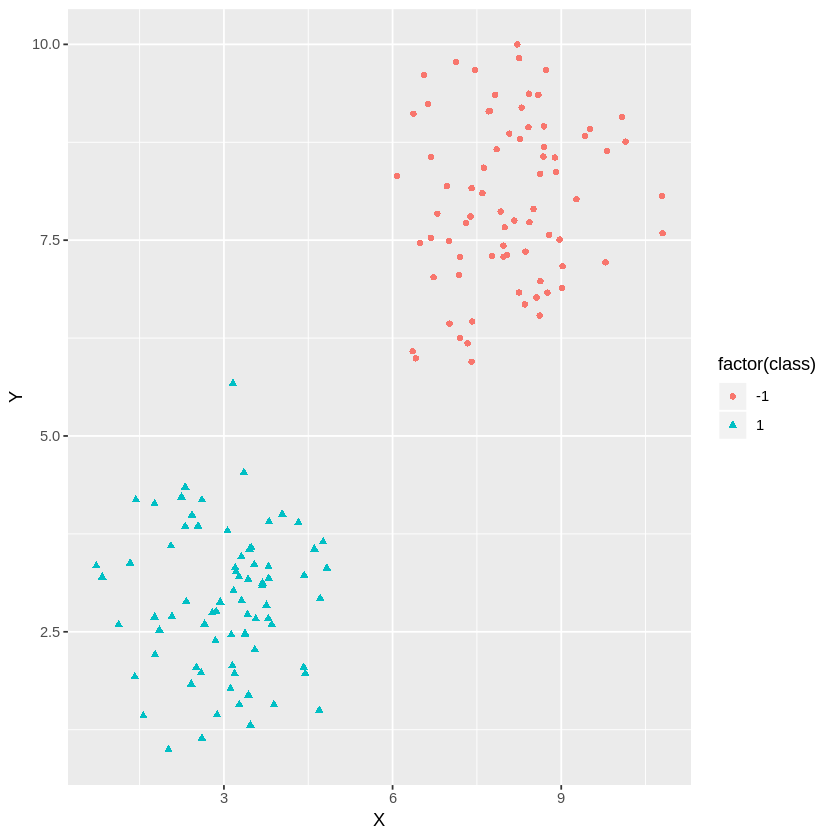

In [4]:
# Visualize the data
# install.packages("ggplot2")
library(ggplot2)
plot <- ggplot(points_data, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class)))
plot

Now we have two linearly separable classes in the data set that are labeled as "+1" and "-1". 
Here are two arbitrary decision boundaries that do pretty good job in separating the classes. 


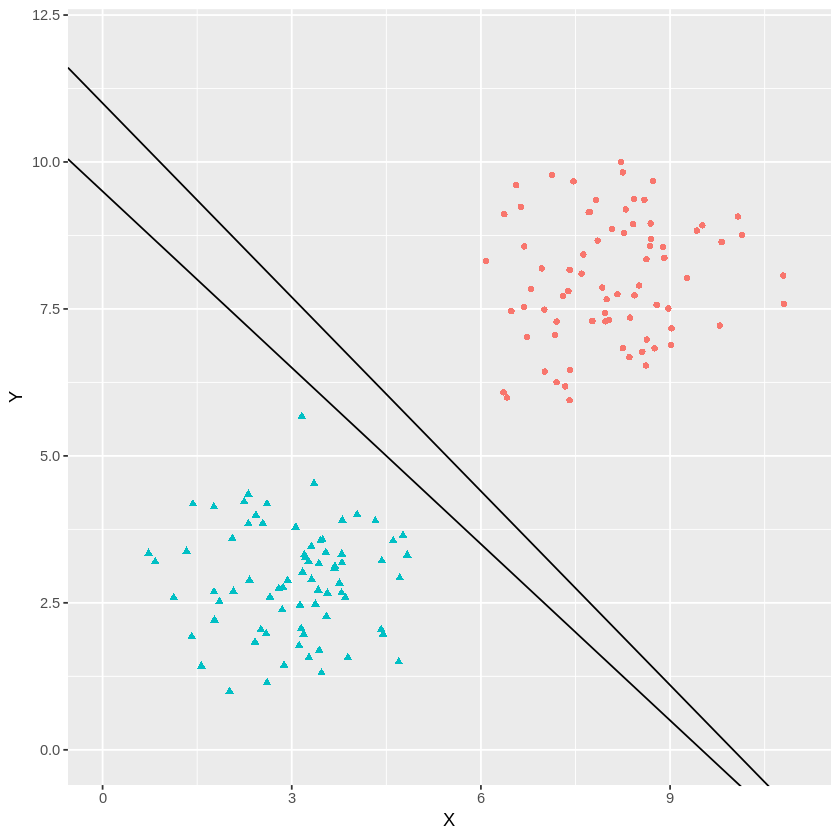

In [5]:
plot + geom_abline(intercept = 9.5, slope = -1) + geom_abline(intercept = 11, slope = -1.1) + 
theme(legend.position = "none") + xlim(0,11) + ylim(0,12)

Call:
lda(class ~ X + Y, data = points_data)

Prior probabilities of groups:
 -1   1 
0.5 0.5 

Group means:
          X        Y
-1 8.067167 7.999703
1  3.039394 2.888176

Coefficients of linear discriminants:
         LD1
X -0.6623821
Y -0.7059972

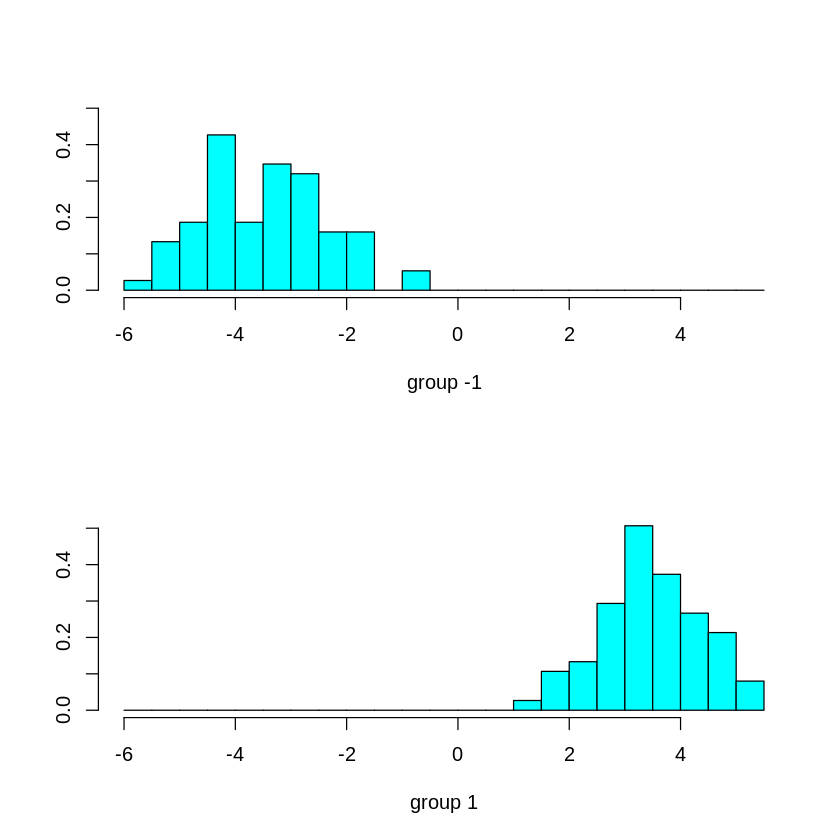

In [6]:
# Let's find the decision boundary of LDA for this data set

library(MASS)
ldafit <- lda(class ~ X + Y, data=points_data)
ldafit
plot(ldafit)
# Run the model on the same data that it was trained with. 
pred <- predict(ldafit)

The above plot shows the values the linear discriminant LD1 takes for the members of each class (class "-1" and class "1"). 
The LD1 is a *linear* combination of X and Y: 

$$LD1 = (-0.6623821)X - (-0.7059972)Y$$

It can separate two classes. 
They are *linearly separable*. 

  * **Remember** the coefficient values change everytime you run the notebook as a new data set is created. Its OK if you see different values for LD1 coefficients. 
    
Let's look at the confusion table. 

In [7]:
# Create a confusion table.
confusion_table <- table(pred$class, points_data$class)
confusion_table

    
     -1  1
  -1 75  0
  1   0 75

We can see that there is no confusion between classes and the accuracy is 100% 
Note: Occasionally, we will see a few misclassified points; 
that is because a new random data set will be created every time you run the code, 
and a few points may end up too close to the other class.

We also want to see the actual decision boundary of the model. 
To plot the LDA decision boundary, 
we'll have to do a bit of extra work, 
don't worry if you don't fully understand what's going on in the next few lines. 
We basically create a grid and make a prediction for each point of the grid and then 
draw a contour plot of the grid on top of our data. 

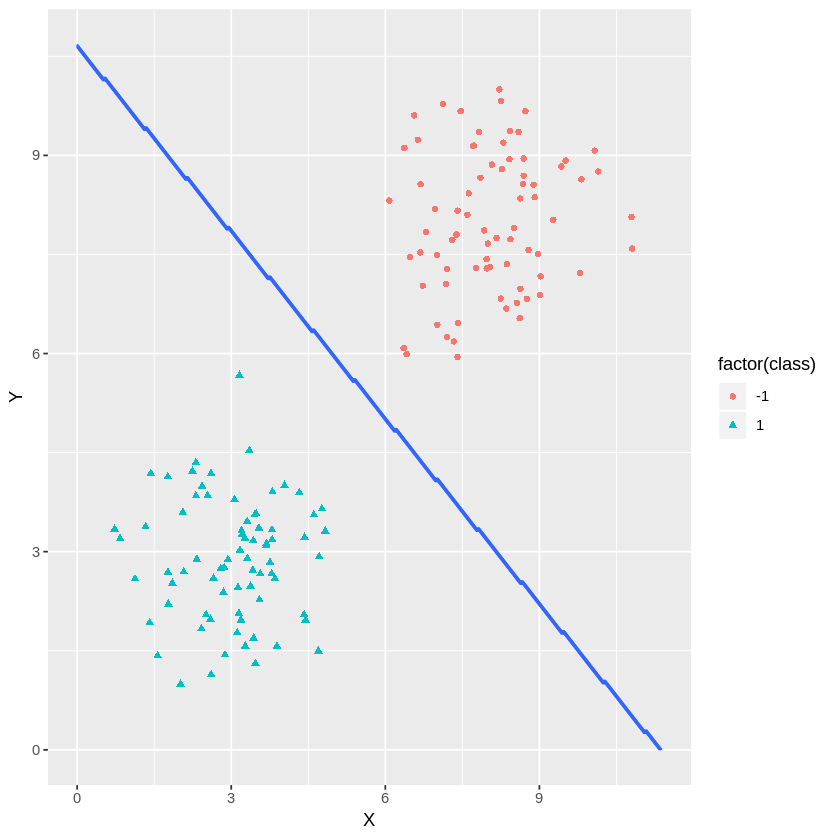

In [8]:
# next three lines are for plotting boundary.
contour_data <- data.frame(expand.grid(X=seq(0,15,length=300),Y=seq(0,15,length=300)))
lda_predict <- data.frame(contour_data, as.numeric(predict(ldafit,contour_data)$class))
names(lda_predict)[3] <- "pred"
plot + stat_contour(aes(x=X, y=Y, z=pred),data=lda_predict)

As you can see, LDA does a good job if the classes are linearly seperable. 
Let's use another data set where they can't be separated without making some errors. 
Here, the samples of different classes will be very closely located so that you
can't find a linear separation without misclassifying some of them. 


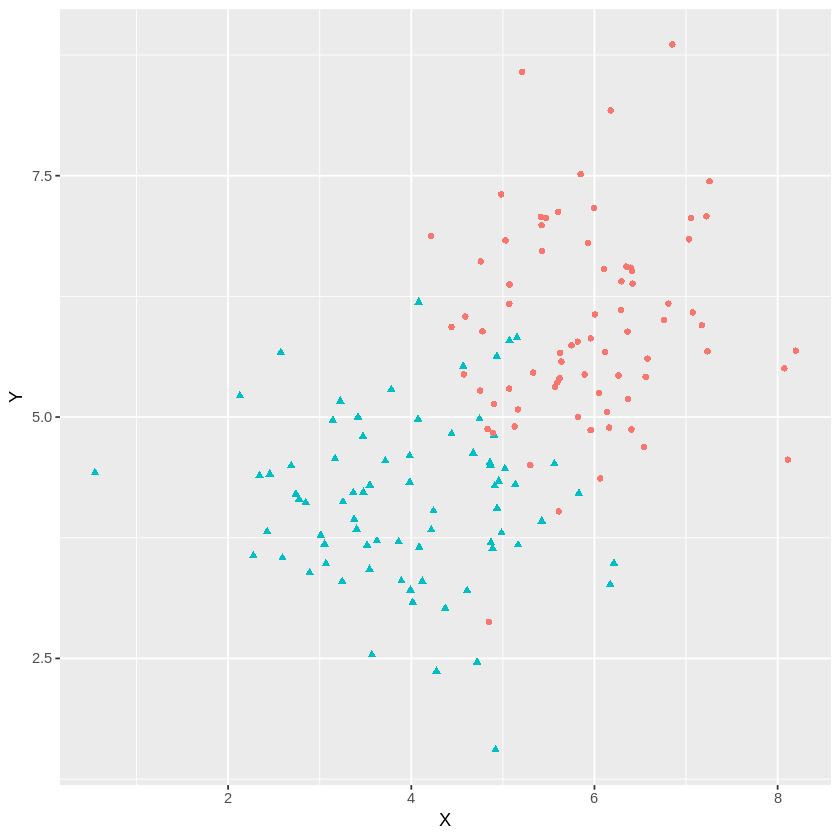

In [9]:
## This is how to create the data; but let's read it from the file instead.
# p1<-cbind(rnorm(n=75,mean=4,sd=1),rnorm(n=75,mean=4,sd=1))
# p2<-cbind(rnorm(n=75,mean=6,sd=1),rnorm(n=75,mean=6,sd=1))
# t<-c(rep(1,75),rep(-1,75))
# data2<-as.data.frame(cbind(rbind(p1,p2),t))
# names(data2)<-c("X","Y","class")
##

# read from the file 
points_data2 <- read.csv("/dsa/data/all_datasets/toydata/data2.csv",header=TRUE)

# Visualize the data
plot2 <- ggplot(points_data2, aes(X, Y)) + 
         geom_point(aes(colour=factor(class),shape=factor(class))) + theme(legend.position="none")
plot2

In [11]:
# Again, run the LDA on this data set
ldafit2 <- lda(<what goes in here>)
plot(ldafit2)
ldafit2

In the above plot, you can see that LD1 does not produce a 100% accurate classification; 
there is an overlap between classes. 
This means that some of the samples of a class will be misclassified as the other class; 
these samples will be on the wrong side of the decision boundary. 
Let's see that. 

----

**expand.grid:** Creates a data frame from all combinations of the supplied vectors or factors. 
In below sample code, x is a vector of length 10 {0, 0.1, 0.2, 0.3.....1}. 
y is a vector of length 5 {-1, -0.5, 0, 0.5, 1}. 
`expand.grid` will create a dataframe with dimenions $50*2$ as a cross product of both x and y vectors.  

In [ ]:
x <- seq(0, 1, length.out = 10)
y <- seq(-1, 1, length.out = 5)
d1 <- expand.grid(x = x, y = y)
dim(d1)

In [ ]:
# Run the model on the same data that it was trained with. 
pred <- predict(ldafit2)
conftable2 <- table(<what goes in here>)
conftable2

contour_data <- data.frame(expand.grid(X=seq(2,8,length=300),Y=seq(2,8,length=300)))
lda_predict2 <- data.frame(contour_data, as.numeric(predict(ldafit2,contour_data)$class))
names(lda_predict2)[3] <- "pred"
plot2 + stat_contour(aes(x=X, y=Y, z=pred),data=lda_predict2)

The classifier does a good job, but not without mistakes. 
Let's compute the accuracy:

In [ ]:
print (paste("accuracy = ",sum(diag(conftable2))/length(pred$class)))

Now, we will create another data set where classes do not have linear separation. 

In [ ]:
# This data set can't be separated by a linear decision boundary, 
# but we can find a nonlinear decision boundary that can do a pretty 
# good job. 

#p1<-cbind(rnorm(n=25,mean=1,sd=0.3),rnorm(n=25,mean=1,sd=0.3))
#p2<-cbind(rnorm(n=25,mean=2,sd=0.3),rnorm(n=25,mean=2,sd=0.3))
#p3<-cbind(rnorm(n=25,mean=3,sd=0.3),rnorm(n=25,mean=3,sd=0.3))
#p4<-cbind(rnorm(n=25,mean=4,sd=0.3),rnorm(n=25,mean=2,sd=0.3))
#p5<-cbind(rnorm(n=25,mean=5,sd=0.3),rnorm(n=25,mean=1,sd=0.3))
#p6<-cbind(rnorm(n=125,mean=3,sd=0.5),rnorm(n=125,mean=1.5,sd=0.2))
#t<-c(rep(1,125),rep(-1,125))
#data3<-as.data.frame(cbind(rbind(p1,p2,p3,p4,p5,p6),t))
#names(data3)<-c("X","Y","class")

# read from file instead

points_data3 <- read.csv("/dsa/data/all_datasets/toydata/data3.csv",header=TRUE)

plot3 <- ggplot(points_data3, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class))) + theme(legend.position="none")
plot3

In [ ]:
# Again, run the LDA on this data set
ldafit3 <- <what goes in here>
plot(ldafit3)

You can see that group (class) "1" response of the LD1 is all over the place; 
this means class "1" samples are on both sides of the decision boundary. 
Class "-1" seems to be mostly on one side of the decision boundary but still has many misclassifications. 
There is no good linear separation; these classes are *not linearly separable*. 

In [ ]:
# Run the model on the same data that it was trained with. 
pred <- predict(ldafit3)
conftable3 <- <what goes in here>
conftable3

contour_data <- data.frame(expand.grid(X=seq(0,6,length=300),Y=seq(0,3,length=300)))
lda_predict3 <- data.frame(contour_data, as.numeric(predict(ldafit3,contour_data)$class))
names(lda_predict3)[3] <- "pred"

plot3 + stat_contour(aes(x=X, y=Y, z=pred),data=lda_predict3) + theme(legend.position="top")

The accuracy is much lower; there is a lot of "confusion" between classes.

In [ ]:
print (paste("accuracy = ",<what goes in here>))

Now, we will create yet another data set; 
this one is known as the "XOR pattern". 
We will have two classes that are linearly _nonseparable_ even though their samples 
seem to be nicely separated in the plot.

In [ ]:
# And this is yet another toy data set where we can't find any linear separation without 
# making gross misclassification. This is the so called "XOR pattern". 
#p11<-cbind(rnorm(n=25,mean=1,sd=0.3),rnorm(n=25,mean=1,sd=0.3))
#p12<-cbind(rnorm(n=25,mean=-1,sd=0.3),rnorm(n=25,mean=1,sd=0.3))
#p13<-cbind(rnorm(n=25,mean=-1,sd=0.3),rnorm(n=25,mean=-1,sd=0.3))
#p14<-cbind(rnorm(n=25,mean=1,sd=0.3),rnorm(n=25,mean=-1,sd=0.3))
#t<-c(rep(1,50),rep(-1,50))
#data4<-as.data.frame(cbind(rbind(p11,p13,p12,p14),t))
#names(data4)<-c("X","Y","class")

# read from file instead
points_data4 <- read.csv("/dsa/data/all_datasets/toydata/data4.csv",header=TRUE)

plot4 <- ggplot(points_data4, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class))) + theme(legend.position="none")
plot4

In [ ]:
# NOW YOUR TURN: find LDA model and compute confusion table and accuracy
<what goes in here>

# display the decision boundary
contour_data <- data.frame(expand.grid(X=seq(-2,2,length=300),Y=seq(-2,2,length=300)))
lda_predict4 <- data.frame(contour_data, as.numeric(predict(ldafit4,contour_data)$class))
names(lda_predict4)[3] <- "pred"

plot4 + stat_contour(aes(x=X, y=Y, z=pred),data=lda_predict4)

In [ ]:
print (paste("accuracy = ",<what goes in here>))

This is pretty much the worst case scenario for an LDA; 
the classifier does not do any better than a "coin toss" (50% accuracy). 
The LD1 response distribution for both classes show a "bimodal" distribution (two peaks) 
on either side of the decision boundary. 
Linear models can not deal with this data set. 
We'll need *nonlinear* models to classify this data set. 


# Save your notebook!